In [15]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages 

import bvh
from joint import Joint

In [16]:
# data_path = '../data/ikuno/straight_data/straight_1_Take_001.bvh'
# ballistic = 'straight'
data_path = '../data/ikuno/slice_headup/headup_1_Take_001.bvh'
ballistic = 'slice'
data, fs, txt = bvh.bvhreader(data_path)

In [17]:
print(data.shape)

(233, 180)


In [18]:
set_joint = Joint().neck
print(set_joint)

{'j_num': 36, 'j_name': 'neck'}


In [19]:
z_rtn = data[:, set_joint['j_num']]
x_rtn = data[:, set_joint['j_num']+1]
y_rtn = data[:, set_joint['j_num']+2]

In [20]:
fs = float(fs)
frame = data.shape[0]
time = np.linspace(0, fs*frame, frame)
top = 100
impact = 141
# print(fs, frame, time, sep='\n')

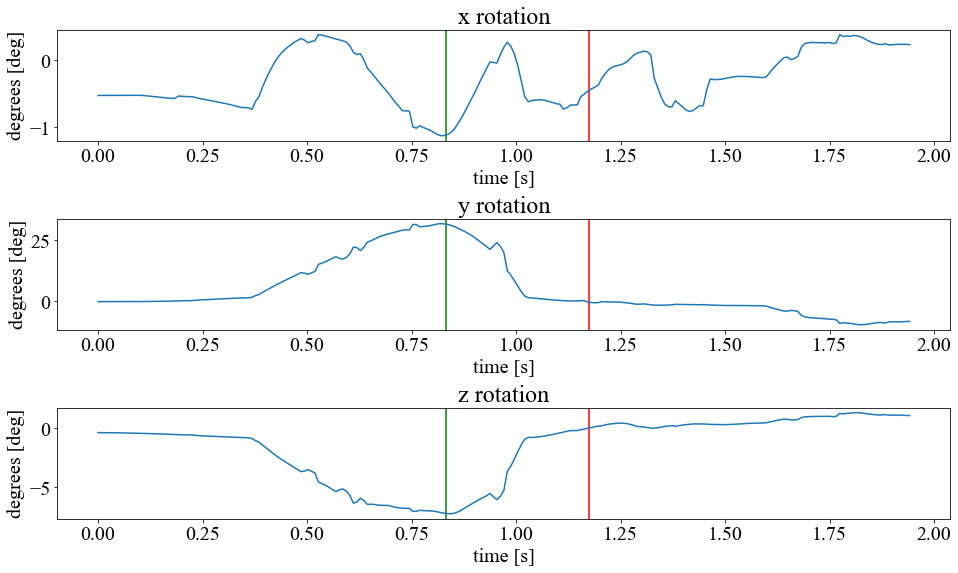

In [21]:
pdf = PdfPages(ballistic + '_' + set_joint['j_name'] + '_row.pdf')
fig, ax = plt.subplots(3, 1, figsize=(16, 9))
plt.subplots_adjust(wspace=0.4, hspace=0.7)
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams['font.size'] = 20

ax[0].set_title('x rotation')
ax[0].set_xlabel('time [s]')
ax[0].set_ylabel('degrees [deg]')
ax[0].axvline(fs*top, c='g')
ax[0].axvline(fs*impact, c='r')
# ax[0].set_ylim(-200, 200)
ax[0].plot(time, x_rtn)

ax[1].set_title('y rotation')
ax[1].axvline(fs*top, c='g')
ax[1].set_xlabel('time [s]')
ax[1].set_ylabel('degrees [deg]')
ax[1].axvline(fs*impact, c='r')
# ax[1].set_ylim(-200, 200)
ax[1].plot(time, y_rtn)

ax[2].set_title('z rotation')
ax[2].set_xlabel('time [s]')
ax[2].set_ylabel('degrees [deg]')
ax[2].axvline(fs*top, c='g')
ax[2].axvline(fs*impact, c='r')
# ax[2].set_ylim(-200, 200)
ax[2].plot(time, z_rtn)

pdf.savefig(fig)
pdf.close()